In [1]:
from games_setup import *
from SBMLLint.common import constants as cn
from SBMLLint.common.molecule import Molecule, MoleculeStoichiometry
from SBMLLint.common.reaction import Reaction
from SBMLLint.games.som import SOM
from SBMLLint.common.simple_sbml import SimpleSBML

import collections
import itertools
import networkx as nx
import numpy as np
import pandas as pd
import scipy
from sympy.matrices import Matrix, eye
#
from SBMLLint.games.message import Message

Current Directory: /Users/woosubshin/Desktop/ModelEngineering/SBMLLint/notebook


In [2]:
simple = load_file_from_curated_data(247)
for r in simple.reactions:
  if r.category != cn.REACTION_BOUNDARY and r.category != cn.REACTION_1_1:
    print(r.makeIdentifier(is_include_kinetics=False))

vGLK: GLCi + P -> G6P
vPFK: F6P + P -> F16P
vALD: F16P -> DHAP + GA3P
vG3PDH: DHAP + NADH -> GLY + NAD
vGAPDH: GA3P + NAD -> BPG + NADH
vPGK: BPG -> P3G + P
vPYK: PEP -> PYR + P
vPDC: PYR -> ACE + CO2
vSUC: 2.00 ACE + 3.00 NAD -> 3.00 NADH + SUCC
vADH: ACE + NADH -> ETOH + NAD
vG6PDH: G6P + NADP -> D6PGluconoLactone + NADPH
vGluDH: D6PGluconate + NADP -> Ribulose5P + NADPH
vTransk1: Ribose5P + Xyl5P -> GA3P + Seduhept7P
vTransald: Seduhept7P + GA3P -> F6P + Erythrose4P
vTransk2: Xyl5P + Erythrose4P -> GA3P + F6P


In [3]:
m = Message(simple)
m

{GA3P};{PEP};{NADH};{Ribulose5P};{X};{P2G};{GLY};{NADP};{GLCo};{D6PGluconoLactone};{ACE};{NAD};{F6P};{D6PGluconate};{ETOH};{F16P};{Xyl5P};{GLCi};{NADPH};{CO2};{Erythrose4P};{BPG};{P};{G6P};{DHAP};{SUCC};{Seduhept7P};{P3G};{PYR};{Ribose5P}

In [4]:
m.som_reactions_lu

[]

In [5]:
m.analyze()

We just analyzed the data...
Type I error:  []
Type II error:  []
Canceling error:  []
Echelon error:  []
Type III error:  []
Type I-SOM error:  set()


False

In [6]:
m.edges

OutEdgeView([({ACE}, {PYR}), ({CO2}, {PYR}), ({PYR}, {P2G, P3G, PEP}), ({F6P, G6P}, {F16P}), ({P2G, P3G, PEP}, {BPG}), ({P, X}, {BPG}), ({P, X}, {P2G, P3G, PEP}), ({P, X}, {F6P, G6P}), ({P, X}, {F16P}), ({P, X}, {D6PGluconate, D6PGluconoLactone}), ({DHAP, GA3P}, {F16P}), ({GLCi, GLCo}, {F6P, G6P}), ({GLCi, GLCo}, {D6PGluconate, D6PGluconoLactone})])

In [7]:
m.nodes

NodeView(({NADH}, {GLY}, {ACE}, {NAD}, {ETOH}, {F16P}, {CO2}, {Erythrose4P}, {BPG}, {SUCC}, {Seduhept7P}, {PYR}, {F6P, G6P}, {P2G, P3G, PEP}, {P, X}, {DHAP, GA3P}, {D6PGluconate, D6PGluconoLactone}, {Ribose5P, Ribulose5P, Xyl5P}, {NADP, NADPH}, {GLCi, GLCo}))

In [8]:
m.get_edge_data(s21, s13)

NameError: name 's21' is not defined

In [14]:
m.echelon_df['reaction_22']

{species_19}    0.0
{species_6}     0.0
{species_12}    0.0
{species_15}    0.0
{species_22}    1.0
{species_3}     0.0
{species_8}     0.0
{species_10}    0.0
{species_9}     0.0
{species_18}    0.0
{species_2}     0.0
{species_20}    0.0
{species_16}    0.0
{species_14}    0.0
{species_17}    0.0
{species_11}    0.0
{species_23}    0.0
{species_1}     0.0
{species_5}     0.0
{species_4}     0.0
{species_13}    1.0
{species_21}   -1.0
{species_7}     0.0
Name: reaction_22, dtype: float64

In [15]:
simple.getReaction('reaction_22')

reaction_22: species_21 -> species_13 + species_22; compartment_1 * k1 * species_21

In [16]:
simple.getReaction('reaction_25')

reaction_25: species_22 -> 3.00 species_8 + species_23; compartment_1 * k1 * species_22

In [30]:
m.som_reactions_lu[14]

reaction_25: {species_22} -> 3.00 {species_8} + {species_23}

In [41]:
m.get_edge_data(s13, s21)

{'reaction': ['reaction_22', 'reaction_25']}

In [40]:
m.get_edge_data(s21, s13)

{'reaction': ['reaction_25']}

In [42]:
m.som_reactions_lu

[reaction_3: {species_4} -> 2.00 {species_5},
 reaction_6: {species_9} -> {species_3} + {species_4},
 reaction_8: {species_10} -> {species_7} + {species_9},
 reaction_9: {species_10} -> {species_6} + {species_11},
 reaction_10: {species_11} -> {species_12} + {species_4},
 reaction_13: {species_14} -> {species_13} + {species_12},
 reaction_15: {species_16} -> {species_14} + {species_15},
 reaction_16: {species_16} -> {species_18} + {species_17},
 reaction_17: {species_17} -> {species_13} + {species_19},
 reaction_20: {species_20} -> {species_17} + {species_15},
 reaction_21: {species_20} -> {species_18} + {species_21},
 reaction_22: {species_21} -> {species_13} + {species_22},
 reaction_23: {species_12} -> {species_8} + {species_23},
 reaction_24: {species_19} -> 2.00 {species_8} + {species_23},
 reaction_25: {species_22} -> 3.00 {species_8} + {species_23},
 reaction_1: {species_1} + {species_2} -> {species_3},
 reaction_2: 2.00 {species_5} -> {species_4},
 reaction_4: {species_8} + {sp

In [41]:
echelon[colname][::-1]

{Br, Ce}    0.0
{BrO3}      0.0
{HOBr}      0.0
{HBrO2}     0.0
Name: Reaction1, dtype: float64

In [77]:
rref_operation = np.identity(echelon_t.shape[0])
rref_operation = pd.DataFrame(rref_operation,
                  index = echelon_t.index,
                  columns = echelon_t.index)
rref_operation

,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,1.0,0.0,0.0,0.0
Reaction2,0.0,1.0,0.0,0.0
Reaction3,0.0,0.0,1.0,0.0
Reaction1,0.0,0.0,0.0,1.0


In [116]:
rref_operation = np.identity(echelon_t.shape[0])
rref_operation = pd.DataFrame(rref_operation,
                  index = echelon_t.index,
                  columns = echelon_t.index)

# now update the operation matrix, finally multiply (dot product) two matrices
echelon = m.echelon_df
for idx, colname in enumerate(echelon.columns):
  reaction_series = echelon[colname]
#   # find the first nonzero values
  nonzero_idx = np.nonzero(echelon[colname])[0]
  # Skip if there is no nonzero value or if it is first reaction
  if not nonzero_idx.any() or idx == 0:
    continue
  nonzero_species = reaction_series.index[nonzero_idx[0]]
  nonzero_value = reaction_series[nonzero_idx[0]]
  # find current nonzero index
  current_echelon = rref_operation.dot(echelon.T).T
  for prev_colname in current_echelon.columns[:idx]:
    print("Colname is: ", colname)
    print("Previous columns are:", prev_colname)
    if np.round(current_echelon[prev_colname][nonzero_species], 3) != 0.0:
      reduction_value = current_echelon[prev_colname][nonzero_species]
      print("We need to reduce ", reduction_value)
      rref_operation.at[prev_colname, colname] = (-1.0) * reduction_value / nonzero_value
rref_operation

Colname is:  Reaction2
Previous columns are: Reaction4
We need to reduce  1.0
Colname is:  Reaction3
Previous columns are: Reaction4
We need to reduce  1.3333333333333333
Colname is:  Reaction3
Previous columns are: Reaction2
We need to reduce  -0.5


,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,1.0,-0.666667,4.0,0.0
Reaction2,0.0,1.000000,-1.5,0.0
Reaction3,0.0,0.000000,1.0,0.0
Reaction1,0.0,0.000000,0.0,1.0


In [120]:
np.round(rref_operation.dot(echelon_t), 3)

,{HBrO2},{HOBr},{BrO3},"{Br, Ce}"
Reaction4,-2.0,0.0,-0.000,6.000
Reaction2,0.0,1.5,-0.000,-3.000
Reaction3,0.0,0.0,-0.333,1.333
Reaction1,0.0,0.0,0.000,0.000


In [121]:
rref_operation.dot(m.lower_inverse)

,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,4.000000,-2.000000,4.0,0.0
Reaction2,-1.500000,1.500000,-1.5,0.0
Reaction3,0.666667,-0.333333,1.0,0.0
Reaction1,1.000000,-1.000000,0.0,1.0


In [108]:
rref_op1 = np.identity(echelon_t.shape[0])
rref_op1 = pd.DataFrame(rref_op1,
          index = echelon_t.index,
          columns = echelon_t.index)
val = 1/1.5*(-1.0)
rref_op1.at['Reaction4', 'Reaction2'] = val
op1 = rref_op1.dot(echelon_t)
op1
rref_op1

,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,1.0,-0.666667,0.0,0.0
Reaction2,0.0,1.000000,0.0,0.0
Reaction3,0.0,0.000000,1.0,0.0
Reaction1,0.0,0.000000,0.0,1.0


In [111]:
op1

,{HBrO2},{HOBr},{BrO3},"{Br, Ce}"
Reaction4,-2.0,5.551115e-17,1.333333,0.666667
Reaction2,0.0,1.500000e+00,-0.500000,-1.000000
Reaction3,0.0,0.000000e+00,-0.333333,1.333333
Reaction1,0.0,0.000000e+00,0.000000,0.000000


In [110]:
rref_op2 = np.identity(echelon_t.shape[0])
rref_op2 = pd.DataFrame(rref_op2,
          index = echelon_t.index,
          columns = echelon_t.index)
val = op1.loc['Reaction4', '{BrO3}'] / op1.loc['Reaction3', '{BrO3}'] * (-1.0)
rref_op2.at['Reaction4', 'Reaction3'] = val
op2 = rref_op2.dot(op1)
op2
rref_op2

,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,1.0,0.0,4.0,0.0
Reaction2,0.0,1.0,0.0,0.0
Reaction3,0.0,0.0,1.0,0.0
Reaction1,0.0,0.0,0.0,1.0


In [113]:
op2

,{HBrO2},{HOBr},{BrO3},"{Br, Ce}"
Reaction4,-2.0,5.551115e-17,-7.401487e-17,6.000000
Reaction2,0.0,1.500000e+00,-5.000000e-01,-1.000000
Reaction3,0.0,0.000000e+00,-3.333333e-01,1.333333
Reaction1,0.0,0.000000e+00,0.000000e+00,0.000000


In [106]:
rref_op1

,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,1.0,-0.666667,1.0,0.0
Reaction2,0.0,1.000000,-1.5,0.0
Reaction3,0.0,0.000000,1.0,0.0
Reaction1,0.0,0.000000,0.0,1.0


In [103]:
rref_op2

,Reaction4,Reaction2,Reaction3,Reaction1
Reaction4,1.0,-0.666667,1.0,0.0
Reaction2,0.0,1.000000,-1.5,0.0
Reaction3,0.0,0.000000,1.0,0.0
Reaction1,0.0,0.000000,0.0,1.0


In [95]:
np.round(rref_operation.dot(echelon_t), 3)

,{HBrO2},{HOBr},{BrO3},"{Br, Ce}"
Reaction4,-2.0,0.0,0.333,4.667
Reaction2,0.0,1.5,-0.000,-3.000
Reaction3,0.0,0.0,-0.333,1.333
Reaction1,0.0,0.0,0.000,0.000


In [94]:
m.convertMatrixToSOMReactions(np.round(rref_operation.dot(echelon_t), 3).T)

[Reaction4: 2.00 {HBrO2} -> 0.33 {BrO3} + 4.67 {Br, Ce},
 Reaction2: 3.00 {Br, Ce} -> 1.50 {HOBr},
 Reaction3: 0.33 {BrO3} -> 1.33 {Br, Ce},
 Reaction1:  -> ]

In [90]:
rref_operation.dot(echelon_t).apply(np.round)

,{HBrO2},{HOBr},{BrO3},"{Br, Ce}"
Reaction4,-2.0,0.0,0.0,5.0
Reaction2,0.0,2.0,-0.0,-3.0
Reaction3,0.0,0.0,-0.0,1.0
Reaction1,0.0,0.0,0.0,0.0


In [11]:
m.convertMatrixToReactions(simple, m.permuted_matrix)

[ReactionSummary(label=Reaction1, reactants=[BrO3 *  1.00, Br *  1.00], products=[HBrO2 *  1.00, HOBr *  1.00], category='reaction_n_n'),
 ReactionSummary(label=Reaction3, reactants=[BrO3 *  1.00], products=[Ce *  1.00, HBrO2 *  1.00], category='reaction_1_n'),
 ReactionSummary(label=Reaction2, reactants=[Br *  1.00, HBrO2 *  1.00], products=[HOBr *  2.00], category='reaction_n_n'),
 ReactionSummary(label=Reaction5, reactants=[Ce *  1.00], products=[Br *  1.00], category='reaction_1_1'),
 ReactionSummary(label=Reaction4, reactants=[HBrO2 *  2.00], products=[BrO3 *  1.00, HOBr *  1.00], category='reaction_n_n')]

In [12]:
m.analyze()

We just analyzed the data...
RREF error:  []
Type I error:  []
Type II error:  []


True

In [13]:
m

{Ce}->{HOBr}
{Br}->{HOBr}
{HOBr}->{HBrO2}
{BrO3}

In [32]:
# mat_df = m.stoichiometry_matrix
# mat_t = mat_df.T

# mat_t
# idx_mat_t = mat_t.index
# # # LU decomposition
# mat_lu = scipy.linalg.lu(mat_t)
# # # inverse pivot matrix
# p_inv = scipy.linalg.inv(mat_lu[0])
# pivot_index = [list(k).index(1) for k in p_inv]
# new_idx_mat_t = [idx_mat_t[idx] for idx in pivot_index]
# # # row reduced matrix
# row_reduced = pd.DataFrame(mat_lu[2], index=new_idx_mat_t, columns=mat_t.columns)
# row_reduced

In [125]:
rref = [1]
er = []
if rref and not er:
  print("haha")

haha


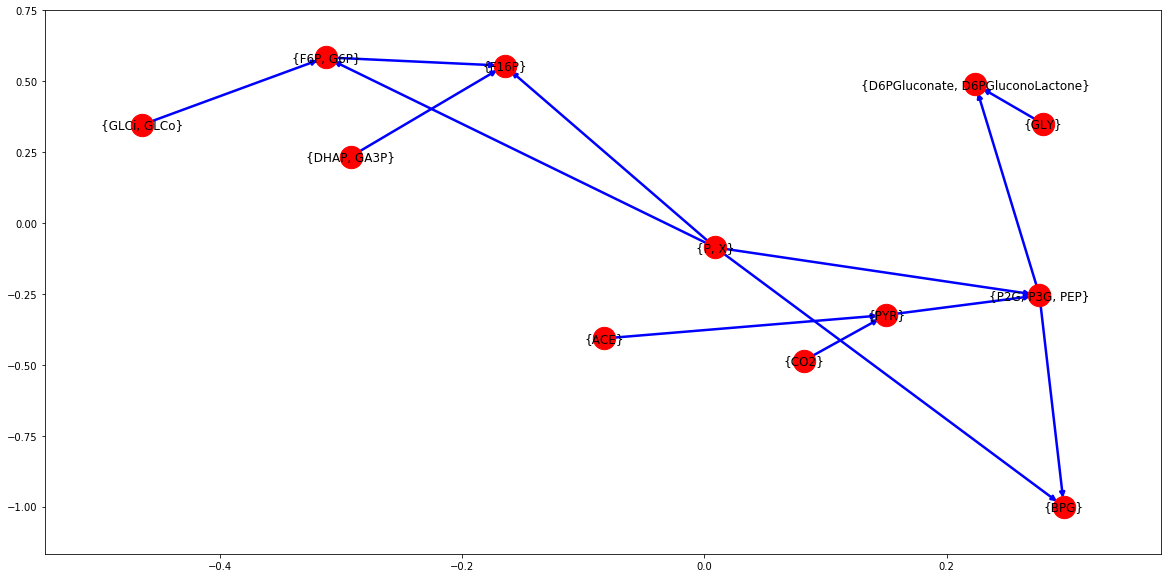

In [32]:
plt.figure(figsize=(20,10))
G = nx.DiGraph()
G.add_edges_from(m.edges)

# Specify the edges you want here

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=G.edges, edge_color='b', width=2.5, arrows=True)
plt.show()